[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


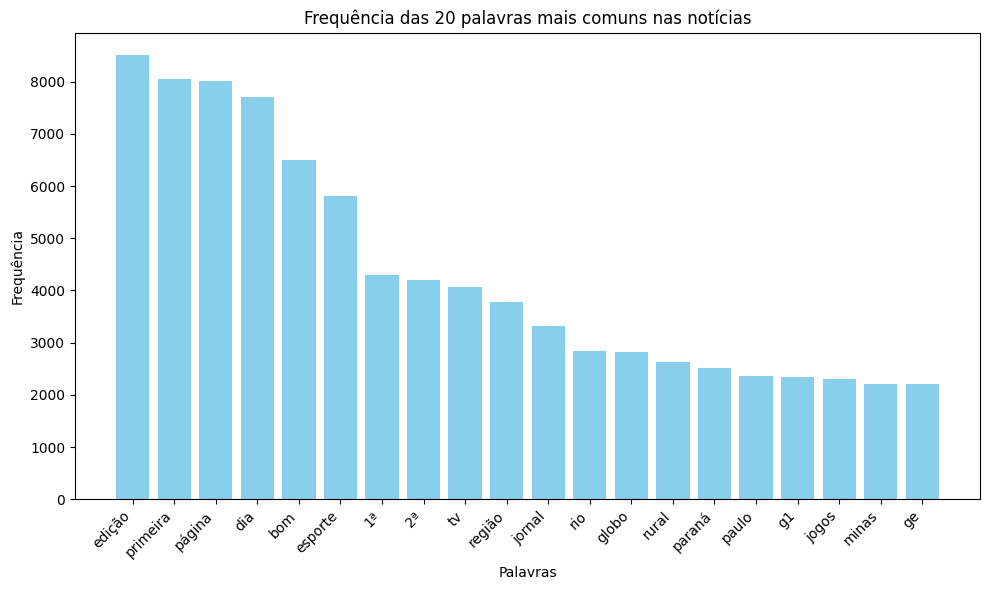

In [1]:
import feedparser  # Importa o módulo para análise de feeds RSS
import requests  # Importa o módulo para fazer solicitações HTTP
import matplotlib.pyplot as plt  # Importa o módulo para plotar gráficos
from bs4 import BeautifulSoup  # Importa a classe BeautifulSoup para analisar HTML
import nltk  # Importa o módulo nltk para processamento de linguagem natural
from nltk.corpus import stopwords  # Importa a lista de stopwords da nltk
from nltk.tokenize import word_tokenize  # Importa o tokenizador de palavras da nltk
nltk.download('stopwords')  # Faz o download das stopwords da nltk

# Função para obter o conteúdo HTML de um link
def get_html_content(url):
    try:
        response = requests.get(url)  # Faz uma solicitação HTTP para obter o conteúdo da página
        response.raise_for_status()  # Lança uma exceção se a solicitação falhar
        return response.text  # Retorna o conteúdo HTML da página
    except requests.RequestException as e:
        print(f"Erro ao obter o conteúdo HTML do URL {url}: {e}")
        return None

# Função para coletar todas as palavras de um texto
def collect_words(text):
    words = word_tokenize(text)  # Tokeniza o texto em palavras
    words = [word.lower() for word in words if word.isalnum()]  # Remove pontuações e converte para minúsculas
    return words  # Retorna a lista de palavras

# Função para imprimir as principais notícias de um feed RSS
def print_top_news_rss(site_name, url, max_news=4):
    try:
        feed = feedparser.parse(url)  # Analisa o feed RSS
        print(f"Principais notícias de {site_name}:")
        print("="*50)
        for i, entry in enumerate(feed.entries[:max_news]):
            print(f"Notícia {i+1}:")
            print(entry.title)  # Imprime o título da notícia
            print(entry.link)  # Imprime o link da notícia
            print("-"*50)
    except Exception as e:
        print(f"Erro ao processar o feed RSS {url}: {e}")

# Lista de feeds RSS dos sites que serão buscadas as notícias
rss_feeds = {
    "Greenpeace Brasil": "https://www.greenpeace.org/brasil/feed/",
    "G1 - Natureza": "https://g1.globo.com/rss/g1/natureza/",
    "Instituto Akatu": "https://www.akatu.org.br/feed/",
    "O Eco": "https://www.oeco.org.br/feed/",
}

# Coleta todas as palavras das notícias
all_words = []
for site, rss_feed in rss_feeds.items():
    feed = feedparser.parse(rss_feed)  # Analisa o feed RSS
    for entry in feed.entries:
        html_content = get_html_content(entry.link)  # Obtém o conteúdo HTML da página
        if html_content:
            soup = BeautifulSoup(html_content, 'html.parser')  # Analisa o HTML da página
            text = soup.get_text()  # Obtém o texto da página
            words = collect_words(text)  # Coleta as palavras do texto
            all_words.extend(words)  # Adiciona as palavras à lista de todas as palavras

# Remover stopwords (palavras comuns que não contribuem significativamente para o significado)
stop_words = set(stopwords.words('portuguese'))  # Obtém as stopwords em português
filtered_words = [word for word in all_words if word not in stop_words]  # Remove as stopwords das palavras coletadas

# Calcular a frequência das palavras
word_freq = nltk.FreqDist(filtered_words)  # Calcula a frequência das palavras

# Obter as palavras mais comuns e suas frequências
top_words = word_freq.most_common(20)  # Obtém as 20 palavras mais comuns e suas frequências
top_words, frequencies = zip(*top_words)  # Separa as palavras e frequências em duas listas

# Plotar o gráfico de barras das palavras mais comuns
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico
plt.bar(top_words, frequencies, color='skyblue')  # Plota o gráfico de barras com as palavras e frequências
plt.xlabel('Palavras')  # Adiciona um rótulo ao eixo x
plt.ylabel('Frequência')  # Adiciona um rótulo ao eixo y
plt.title('Frequência das 20 palavras mais comuns nas notícias')  # Adiciona um título ao gráfico
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta o layout do gráfico para evitar sobreposições
plt.show()  # Exibe o gráfico de barras


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Computador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


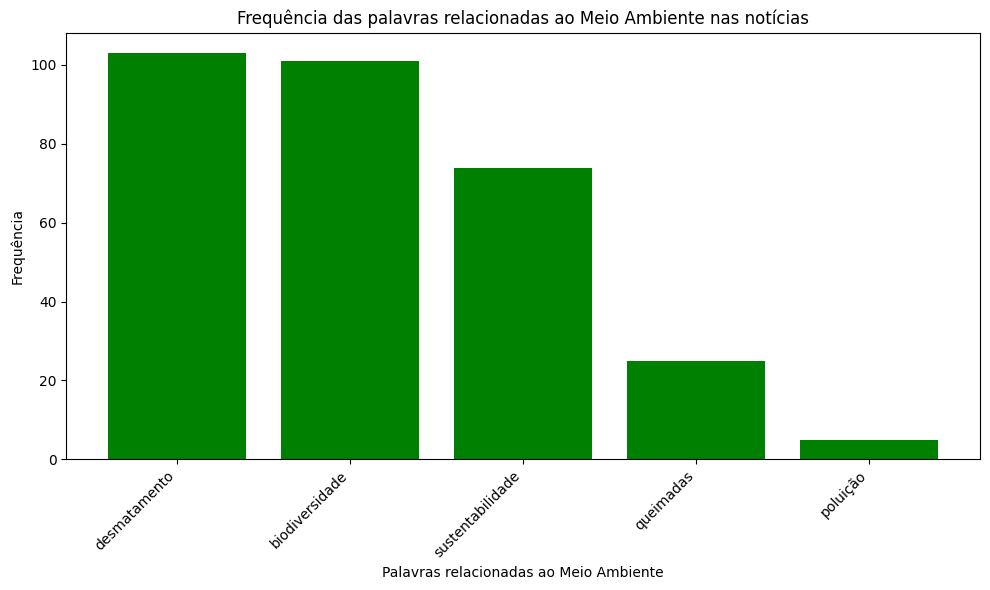

In [1]:
import feedparser
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

# Função para obter o conteúdo HTML de um link
def get_html_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Lança uma exceção se a solicitação falhar
        return response.text
    except requests.RequestException as e:
        print(f"Erro ao obter o conteúdo HTML do URL {url}: {e}")
        return None

# Função para coletar todas as palavras de um texto
def collect_words(text):
    words = word_tokenize(text)  # Tokeniza o texto em palavras
    words = [word.lower() for word in words if word.isalnum()]  # Remove pontuações e converte para minúsculas
    return words  # Retorna a lista de palavras

# Função para imprimir as principais notícias de um feed RSS
def print_top_news_rss(site_name, url, max_news=4):
    try:
        feed = feedparser.parse(url)  # Analisa o feed RSS
        print(f"Principais notícias de {site_name}:")
        print("="*50)
        for i, entry in enumerate(feed.entries[:max_news]):
            print(f"Notícia {i+1}:")
            print(entry.title)  # Imprime o título da notícia
            print(entry.link)  # Imprime o link da notícia
            print("-"*50)
    except Exception as e:
        print(f"Erro ao processar o feed RSS {url}: {e}")

# Lista de feeds RSS dos sites que serão buscadas as notícias
rss_feeds = {
    "Greenpeace Brasil": "https://www.greenpeace.org/brasil/feed/",
    "G1 - Natureza": "https://g1.globo.com/rss/g1/natureza/",
    "Instituto Akatu": "https://www.akatu.org.br/feed/",
    "O Eco": "https://www.oeco.org.br/feed/",
}

# Lista de palavras relacionadas ao meio ambiente que queremos buscar
environment_related_words = ["queimadas", "enchente", "poluição", "desmatamento", "biodiversidade", "sustentabilidade"]

# Coleta todas as palavras das notícias
all_words = []
for site, rss_feed in rss_feeds.items():
    feed = feedparser.parse(rss_feed)  # Analisa o feed RSS
    for entry in feed.entries:
        html_content = get_html_content(entry.link)  # Obtém o conteúdo HTML da página
        if html_content:
            soup = BeautifulSoup(html_content, 'html.parser')  # Analisa o HTML da página
            text = soup.get_text()  # Obtém o texto da página
            words = collect_words(text)  # Coleta as palavras do texto
            all_words.extend(words)  # Adiciona as palavras à lista de todas as palavras

# Remover stopwords (palavras comuns que não contribuem significativamente para o significado)
stop_words = set(stopwords.words('portuguese'))  # Obtém as stopwords em português
filtered_words = [word for word in all_words if word not in stop_words]  # Remove as stopwords das palavras coletadas

# Identificar e contar as palavras relacionadas ao meio ambiente
environment_words = [word for word in filtered_words if word in environment_related_words]
word_freq = nltk.FreqDist(environment_words)

# Obter as palavras mais comuns e suas frequências
top_words = word_freq.most_common(20)
top_words, frequencies = zip(*top_words)  # Separa as palavras e frequências em duas listas

# Plotar o gráfico de barras das palavras mais comuns relacionadas ao meio ambiente
plt.figure(figsize=(10, 6))
plt.bar(top_words, frequencies, color='green')
plt.xlabel('Palavras relacionadas ao Meio Ambiente')
plt.ylabel('Frequência')
plt.title('Frequência das palavras relacionadas ao Meio Ambiente nas notícias')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
